<a href="https://colab.research.google.com/github/kasnk/machine_Learning/blob/main/60_ML_MSPA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [4]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)



Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.drop('Date', axis=1)

In [6]:
numerical_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_cols = ['Gender', 'Product Category']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
df = df.drop(categorical_cols, axis=1)
df_prepared = pd.concat([df, encoded_df], axis=1)

display(df_prepared.head())

,Transaction ID,Customer ID,Age,Quantity,Price per Unit,Total Amount,DayOfWeek,Month,Year,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,1,CUST001,-0.540565,0.429265,-0.685123,-0.546704,4,11,2023,0.0,1.0,1.0,0.0,0.0
1,2,CUST002,-1.125592,-0.453996,1.688464,0.971919,0,2,2023,1.0,0.0,0.0,1.0,0.0
2,3,CUST003,0.629489,-1.337258,-0.790615,-0.761098,4,1,2023,0.0,1.0,0.0,0.0,1.0
3,4,CUST004,-0.321180,-1.337258,1.688464,0.078611,6,5,2023,0.0,1.0,0.0,1.0,0.0
4,5,CUST005,-0.833078,-0.453996,-0.685123,-0.636035,5,5,2023,0.0,1.0,1.0,0.0,0.0


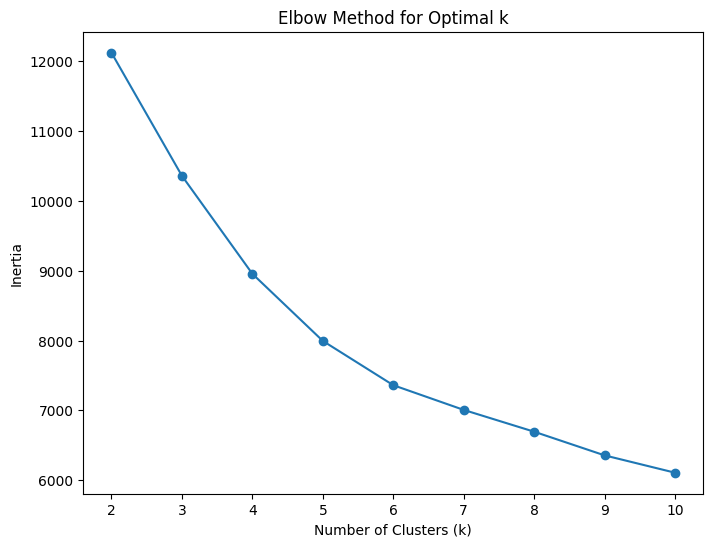

,Transaction ID,Customer ID,Age,Quantity,Price per Unit,Total Amount,DayOfWeek,Month,Year,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,cluster
0,1,CUST001,-0.540565,0.429265,-0.685123,-0.546704,4,11,2023,0.0,1.0,1.0,0.0,0.0,1
1,2,CUST002,-1.125592,-0.453996,1.688464,0.971919,0,2,2023,1.0,0.0,0.0,1.0,0.0,0
2,3,CUST003,0.629489,-1.337258,-0.790615,-0.761098,4,1,2023,0.0,1.0,0.0,0.0,1.0,2
3,4,CUST004,-0.321180,-1.337258,1.688464,0.078611,6,5,2023,0.0,1.0,0.0,1.0,0.0,2
4,5,CUST005,-0.833078,-0.453996,-0.685123,-0.636035,5,5,2023,0.0,1.0,1.0,0.0,0.0,2


In [12]:
from sklearn.cluster import KMeans
inertia_values = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_prepared[['Age', 'Quantity', 'Price per Unit', 'Total Amount', 'DayOfWeek', 'Month', 'Year', 'Gender_Female', 'Gender_Male', 'Product Category_Beauty', 'Product Category_Clothing', 'Product Category_Electronics']])
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_prepared[['Age', 'Quantity', 'Price per Unit', 'Total Amount', 'DayOfWeek', 'Month', 'Year', 'Gender_Female', 'Gender_Male', 'Product Category_Beauty', 'Product Category_Clothing', 'Product Category_Electronics']])
df_prepared['cluster'] = kmeans.labels_

display(df_prepared.head())

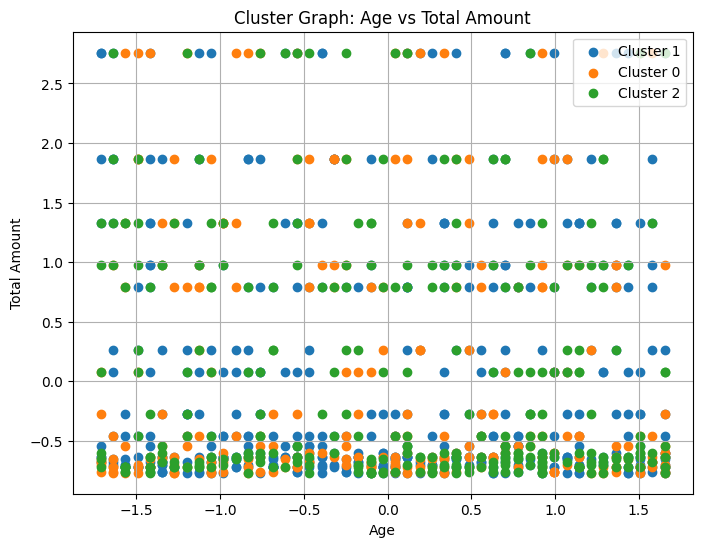

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))


for cluster_label in df_prepared['cluster'].unique():
    cluster_data = df_prepared[df_prepared['cluster'] == cluster_label]
    plt.scatter(cluster_data['Age'], cluster_data['Total Amount'], label=f'Cluster {cluster_label}')


plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.title('Cluster Graph: Age vs Total Amount')
plt.legend()
plt.grid(True)
plt.show()